In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
from statsmodels.tsa.stattools import adfuller
import datetime
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.dates as mdates
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from prophet import Prophet

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
mensual = pd.read_csv('mensual_ext.csv')
mensual['pickup_datetime'] = pd.to_datetime(mensual['pickup_datetime'])
mensual.set_index('pickup_datetime', inplace=True)

# Mensuales

In [6]:
mensual

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2022-03-31,4270445,5654635.96,46130518.27,3.426591e+07,3075023
2022-04-30,4228947,5631284.80,45576361.41,3.418014e+07,3004149
2022-05-31,4069075,5489703.55,44850317.06,3.410236e+07,2926385
2022-06-30,4062172,5459604.00,44781679.81,3.402593e+07,2917367
2022-07-31,3724235,4982858.94,39702293.79,2.932747e+07,2627194
2022-08-31,3669188,4896650.61,39217964.21,2.909971e+07,2600258
2022-09-30,3522192,4713024.55,39442410.03,3.048464e+07,2552011
2022-10-31,4102538,5466063.56,45936698.79,3.558027e+07,2975223
2022-11-30,3650821,4779731.95,40597166.88,3.146803e+07,2639133


In [7]:
mensual_p = mensual['n_trips']

In [8]:
mensual_p

,n_trips
pickup_datetime,
2022-03-31,3075023
2022-04-30,3004149
2022-05-31,2926385
2022-06-30,2917367
2022-07-31,2627194
2022-08-31,2600258
2022-09-30,2552011
2022-10-31,2975223
2022-11-30,2639133


In [9]:
mensual_p = mensual_p.reset_index()

In [10]:
mensual_p.rename(columns= {'pickup_datetime': 'ds', 'n_trips' : 'y'}, inplace = True)
mensual_p

,ds,y
0,2022-03-31,3075023
1,2022-04-30,3004149
2,2022-05-31,2926385
3,2022-06-30,2917367
4,2022-07-31,2627194
5,2022-08-31,2600258
6,2022-09-30,2552011
7,2022-10-31,2975223
8,2022-11-30,2639133
9,2022-12-31,2729661


## Modelo

In [81]:
# Instanciamos un modelo de Prophet

prophet_1 = Prophet(yearly_seasonality= True, uncertainty_samples = 1000, mcmc_samples=100, interval_width= 0.7, seasonality_prior_scale=1,changepoint_prior_scale =0.06)

# Entrenamos el modelo
prophet_1.fit(mensual_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 12 meses.
build_forecast = prophet_1.make_future_dataframe(periods=24, freq='M') #

# Predecimos
forecast_1 = prophet_1.predict(build_forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpul_yn2ty/khn_gvmj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpul_yn2ty/1rjs9m2b.json
02:10:47 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=72480', 'data', 'file=/tmp/tmpul_yn2ty/khn_gvmj.json', 'init=/tmp/tmpul_yn2ty/1rjs9m2b.json', 'output', 'file=/tmp/tmpul_yn2ty/prophet_model1h5054pz/prophet_model-20241119021047_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=72480', 'data', 'file=/tmp/tmpul_yn2ty/khn_gvmj.json', 'init=/tmp/tmpul_yn2ty/1rjs9m2b.json', 'output', 'file=/tmp/tmpul_yn2ty/prophet_model1h5054pz/prophet_model-20241119021047_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

02:10:50 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=72480', 'data', 'file=/tmp/tmpul_yn2ty/khn_gvmj.json', 'init=/tmp/tmpul_yn2ty/1rjs9m2b.json', 'output', 'file=/tmp/tmpul_yn2ty/prophet_model1h5054pz/prophet_model-20241119021047_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpul_yn2ty/prophet_model1h5054pz/prophet_model-20241119021047_1.csv
 console_msgs (if any):
	/tmp/tmpul_yn2ty/prophet_model1h5054pz/prophet_model-20241119021047_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [82]:
forecast_1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-03-31,2.830635e+06,2.983270e+06,3.197356e+06,2.749209e+06,2.912579e+06,253375.710399,185088.312044,318522.429022,253375.710399,185088.312044,318522.429022,0.0,0.0,0.0,3.084010e+06
1,2022-04-30,2.816263e+06,2.863184e+06,3.098554e+06,2.754022e+06,2.888513e+06,163248.672490,96049.532159,229373.242895,163248.672490,96049.532159,229373.242895,0.0,0.0,0.0,2.979511e+06
2,2022-05-31,2.801146e+06,2.929495e+06,3.133401e+06,2.746664e+06,2.860573e+06,232141.575705,171707.507297,293600.620935,232141.575705,171707.507297,293600.620935,0.0,0.0,0.0,3.033288e+06
3,2022-06-30,2.788033e+06,2.811534e+06,3.025123e+06,2.742188e+06,2.834817e+06,128509.851374,73661.934616,195297.547335,128509.851374,73661.934616,195297.547335,0.0,0.0,0.0,2.916543e+06
4,2022-07-31,2.773379e+06,2.484640e+06,2.704893e+06,2.728124e+06,2.816284e+06,-177834.074926,-231784.566624,-115506.958524,-177834.074926,-231784.566624,-115506.958524,0.0,0.0,0.0,2.595545e+06
5,2022-08-31,2.757487e+06,2.425003e+06,2.635765e+06,2.712927e+06,2.800116e+06,-234406.760987,-288527.951675,-176530.695377,-234406.760987,-288527.951675,-176530.695377,0.0,0.0,0.0,2.523080e+06
6,2022-09-30,2.739232e+06,2.420187e+06,2.655242e+06,2.688537e+06,2.786494e+06,-203410.513443,-280040.956069,-124719.842261,-203410.513443,-280040.956069,-124719.842261,0.0,0.0,0.0,2.535822e+06
7,2022-10-31,2.718256e+06,2.858690e+06,3.101175e+06,2.668451e+06,2.765814e+06,253842.440175,170278.398013,346674.394979,253842.440175,170278.398013,346674.394979,0.0,0.0,0.0,2.972099e+06
8,2022-11-30,2.696291e+06,2.520892e+06,2.744985e+06,2.644494e+06,2.747008e+06,-63717.970612,-137560.912639,9322.495680,-63717.970612,-137560.912639,9322.495680,0.0,0.0,0.0,2.632573e+06
9,2022-12-31,2.673149e+06,2.597987e+06,2.831642e+06,2.619416e+06,2.721883e+06,47367.935727,-47429.926888,123293.209074,47367.935727,-47429.926888,123293.209074,0.0,0.0,0.0,2.720517e+06


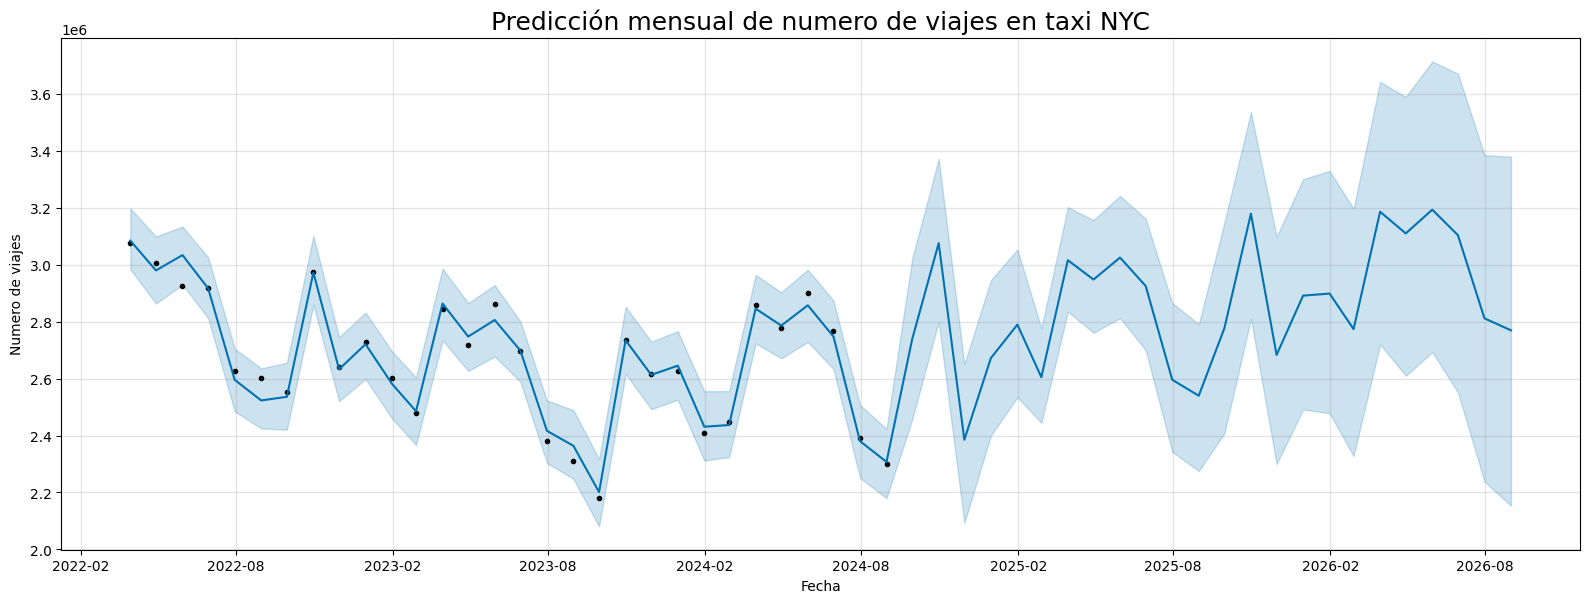

In [83]:
# plot forecasts

prophet_1.plot(forecast_1, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción mensual de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

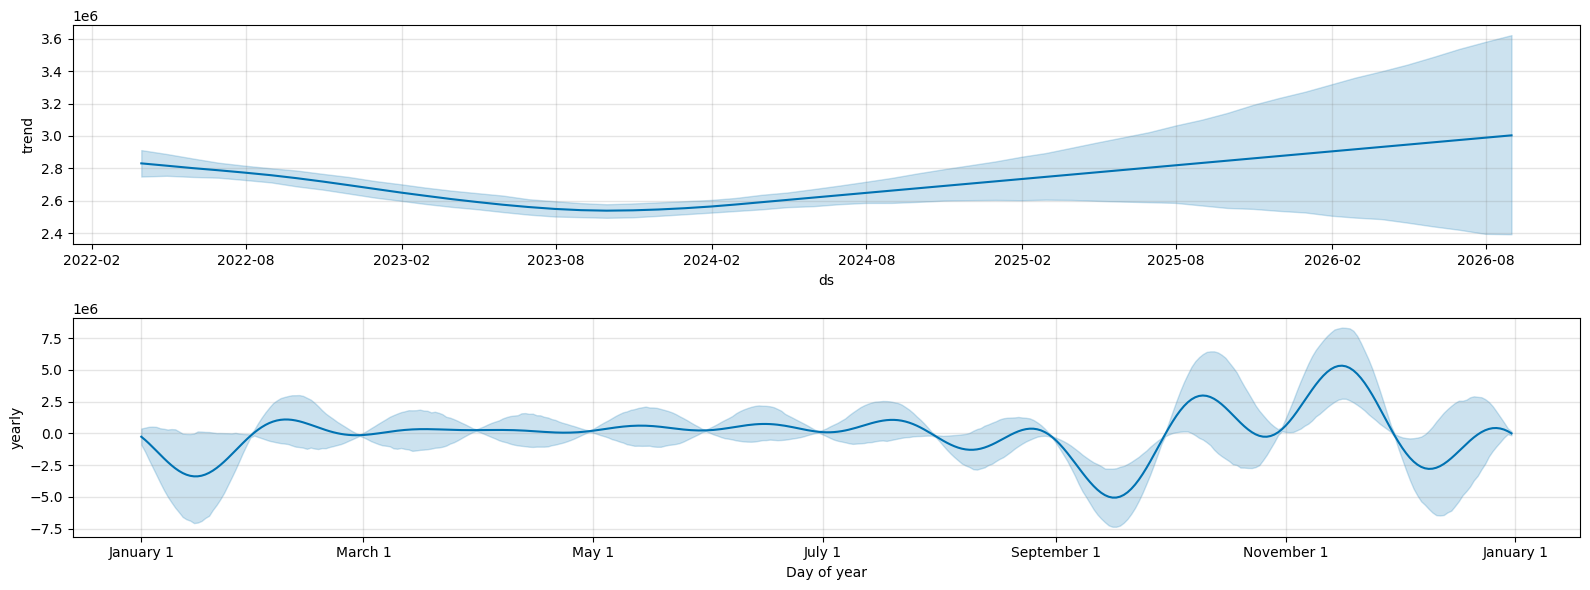

In [84]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet_1.plot_components(forecast_1, figsize=(16,6))

## Evaluacion

In [85]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [86]:
df_cv_1 = cross_validation(prophet_1, initial = '365 days', horizon = '365 days')

INFO:prophet:Making 1 forecasts with cutoffs between 2023-09-01 00:00:00 and 2023-09-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpul_yn2ty/996mtdsu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpul_yn2ty/ugcsjc6r.json
02:10:52 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=7198', 'data', 'file=/tmp/tmpul_yn2ty/996mtdsu.json', 'init=/tmp/tmpul_yn2ty/ugcsjc6r.json', 'output', 'file=/tmp/tmpul_yn2ty/prophet_modelsadd6cwk/prophet_model-20241119021053_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=7198', 'data', 'file=/tmp/tmpul_yn2ty/996mtdsu.json', 'init=/tmp/tmpul_yn2ty/ugcsjc6r.json', 'output', 'file=/tmp/tmpul_yn2ty/prophet_modelsadd6cwk/prophet_model-20241119021053_2.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:

02:10:57 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=7198', 'data', 'file=/tmp/tmpul_yn2ty/996mtdsu.json', 'init=/tmp/tmpul_yn2ty/ugcsjc6r.json', 'output', 'file=/tmp/tmpul_yn2ty/prophet_modelsadd6cwk/prophet_model-20241119021053_1.csv', 'method=sample', 'num_samples=50', 'num_warmup=50', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpul_yn2ty/prophet_modelsadd6cwk/prophet_model-20241119021053_1.csv
 console_msgs (if any):
	/tmp/tmpul_yn2ty/prophet_modelsadd6cwk/prophet_model-20241119021053_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 50
    num_warmup = 50
    save_warmup = 0 (Default)
    thin = 1 (Default)
 

In [87]:
df_cv_1


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-09-30,2.332634e+06,1.953272e+06,2.726322e+06,2179200,2023-09-01
1,2023-10-31,2.656444e+06,2.233902e+06,3.066011e+06,2736389,2023-09-01
2,2023-11-30,2.425709e+06,2.020335e+06,2.834854e+06,2616757,2023-09-01
3,2023-12-31,2.535053e+06,2.114853e+06,2.911382e+06,2625768,2023-09-01
4,2024-01-31,2.407265e+06,2.049574e+06,2.801852e+06,2409342,2023-09-01
5,2024-02-29,2.438784e+06,1.590319e+06,3.256806e+06,2448952,2023-09-01
6,2024-03-31,2.611172e+06,2.103933e+06,3.079768e+06,2858661,2023-09-01
7,2024-04-30,2.647293e+06,2.167088e+06,3.122984e+06,2777362,2023-09-01
8,2024-05-31,2.311145e+06,1.770722e+06,2.812422e+06,2899539,2023-09-01
9,2024-06-30,2.459585e+06,1.850542e+06,3.071455e+06,2767032,2023-09-01


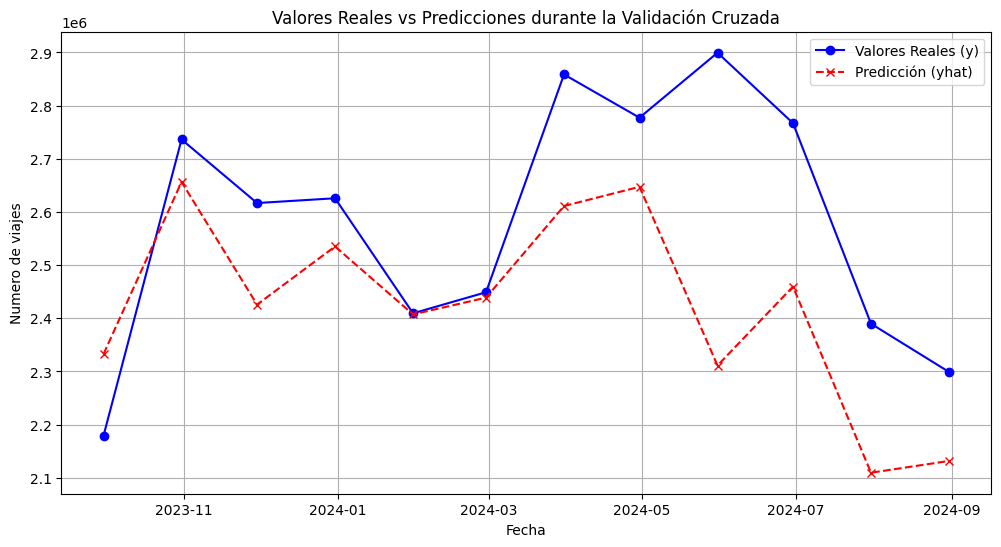

In [88]:
plt.figure(figsize=(12, 6))

plt.plot(df_cv_1['ds'], df_cv_1['y'], label='Valores Reales (y)', color='blue', marker='o')
plt.plot(df_cv_1['ds'], df_cv_1['yhat'], label='Predicción (yhat)', color='red', linestyle='--', marker='x')

plt.xlabel('Fecha')
plt.ylabel('Numero de viajes')
plt.title('Valores Reales vs Predicciones durante la Validación Cruzada')
plt.legend()
plt.grid(True)
plt.show()


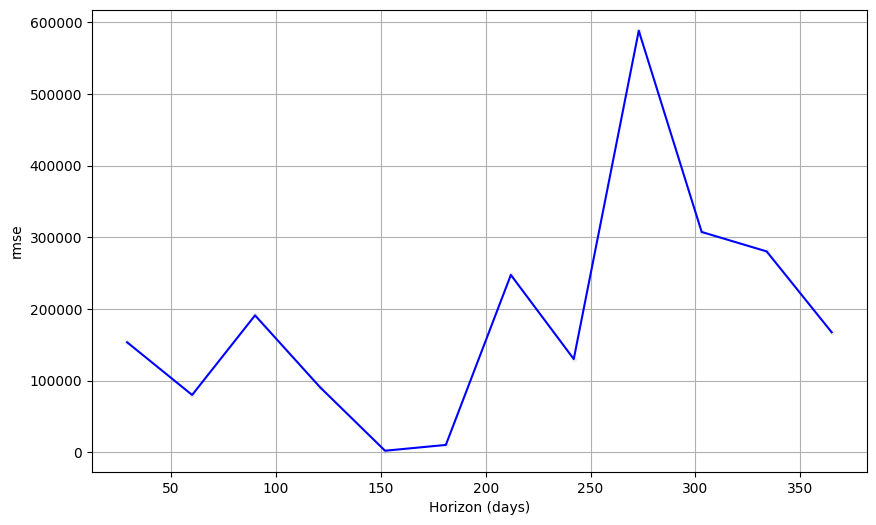

In [89]:
fig = plot_cross_validation_metric(df_cv_1, metric='rmse')

In [90]:
df_p_1 = performance_metrics(df_cv_1)

In [91]:
print('El RMSE es:', df_p_1.rmse.mean())

El RMSE es: 187375.53197309628


In [92]:
print('El MAE es:', df_p_1.mae.mean())

El MAE es: 187375.53197309628


In [93]:
print('La cobertura es:', df_p_1.coverage.mean())

La cobertura es: 0.9166666666666666


In [94]:
print('La MAPE es:', df_p_1.mape.mean())

La MAPE es: 0.07081296819487908


In [95]:
df_p_1.describe()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,12,1.200000e+01,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,196 days 20:00:00,5.835566e+10,187375.531973,187375.531973,0.070813,0.070813,0.074644,0.916667
std,109 days 20:33:46.987269072,9.578448e+10,159246.176053,159246.176053,0.055965,0.055965,0.061946,0.288675
min,29 days 00:00:00,4.312047e+06,2076.546976,2076.546976,0.000862,0.000862,0.000862,0.000000
25%,113 days 06:00:00,7.769669e+09,88022.275403,88022.275403,0.033215,0.033215,0.033779,1.000000
50%,196 days 12:00:00,2.578563e+10,160426.712629,160426.712629,0.071616,0.071616,0.071794,1.000000
75%,280 days 12:00:00,6.558046e+10,255692.310629,255692.310629,0.092709,0.092709,0.097281,1.000000
max,365 days 00:00:00,3.462073e+11,588393.805643,588393.805643,0.202927,0.202927,0.225841,1.000000


In [96]:
df_p = performance_metrics(df_cv_1, rolling_window = 1)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,365 days,5.835566e+10,241569.153358,187375.531973,0.070813,0.071616,0.074644,0.916667


In [98]:
forecast_1.to_csv('forecast_mensual.csv')